In [27]:
import lasagne
import theano
from theano import tensor as T
from lasagne.layers import *
from lasagne.nonlinearities import *
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
l_in = InputLayer((None, 1))
l_copy = DenseLayer(l_in, num_units=4)
l_copy.W.set_value( np.ones((1,4)) )

In [4]:
X = T.fmatrix('X')

In [5]:
copy_val = get_output(l_copy, X).eval({X: np.asarray([[1.],[2.]]).astype("float32")})
copy_val

array([[ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.]])

In [6]:
c = np.asarray([[1.0,2.0,3.0,4.0]])
cf = factorial(c)
print cf

[[  1.   2.   6.  24.]]


In [7]:
(c*np.log(copy_val+0.01)) - copy_val

array([[-0.99004967, -0.98009934, -0.97014901, -0.96019868],
       [-1.30186528, -0.60373056,  0.09440417,  0.79253889]])

In [8]:
tau = 0.3

In [9]:
l_pois = ExpressionLayer(l_copy, lambda x: ((c*T.log(x+0.01)) - x - T.log(cf)) / tau )

In [10]:
l_softmax = NonlinearityLayer(l_pois, nonlinearity=softmax)

In [209]:
f_dists = get_output(l_softmax, X).eval({X: np.asarray([[1.5],[2.5]]).astype("float32")})
f_dists

array([[ 0.5763631 ,  0.32854138,  0.08323413,  0.01186138],
       [ 0.24320899,  0.38306025,  0.26814643,  0.10558433]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

[[ 0.32029351]]


<Container object of 4 artists>

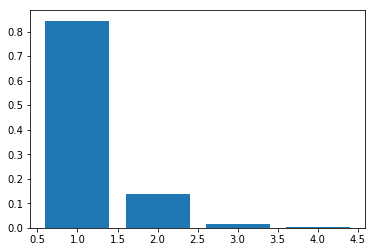

In [178]:
rnd = np.abs(np.random.normal(0,1,size=(1,1)))
some_output = get_output(l_softmax, X).eval({X: rnd.astype("float32")})
print rnd
plt.bar( [1,2,3,4], some_output[0])

In [15]:
print arr

[ 0.          0.17241379  0.34482759  0.51724138  0.68965517  0.86206897
  1.03448276  1.20689655  1.37931034  1.55172414  1.72413793  1.89655172
  2.06896552  2.24137931  2.4137931   2.5862069   2.75862069  2.93103448
  3.10344828  3.27586207  3.44827586  3.62068966  3.79310345  3.96551724
  4.13793103  4.31034483  4.48275862  4.65517241  4.82758621  5.        ]


In [18]:
?plt.bar

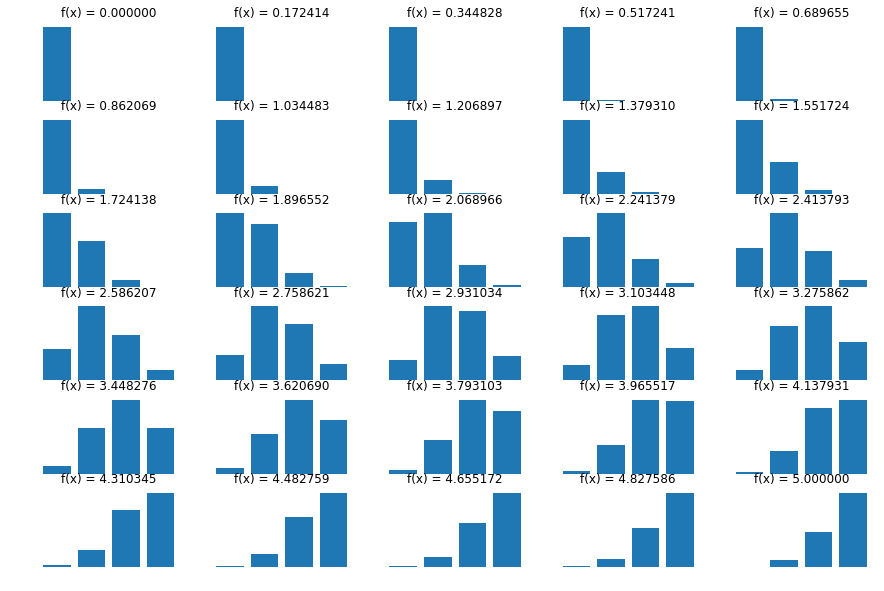

In [23]:
plt.figure(figsize=(15,10))
arr = np.linspace(0, 5, num=30)
for i in range(0, len(arr)):
    plt.subplot(6, 5, i+1)
    rnd = np.asarray([[arr[i]]]).astype("float32")
    some_output = get_output(l_softmax, X).eval({X: rnd.astype("float32")})
    plt.title('f(x) = %f' % arr[i])
    plt.axis('off')
    plt.bar( [1,2,3,4], some_output[0])
    #plt.show()

In [222]:
arr

array([ 0.        ,  0.17241379,  0.34482759,  0.51724138,  0.68965517,
        0.86206897,  1.03448276,  1.20689655,  1.37931034,  1.55172414,
        1.72413793,  1.89655172,  2.06896552,  2.24137931,  2.4137931 ,
        2.5862069 ,  2.75862069,  2.93103448,  3.10344828,  3.27586207,
        3.44827586,  3.62068966,  3.79310345,  3.96551724,  4.13793103,
        4.31034483,  4.48275862,  4.65517241,  4.82758621,  5.        ])

In [221]:
import pydot
theano.printing.pydotprint(get_output(l_softmax,X))

ImportError: No module named pydot

In [196]:
np.linspace(0, 3, num=30)

array([ 0.        ,  0.10344828,  0.20689655,  0.31034483,  0.4137931 ,
        0.51724138,  0.62068966,  0.72413793,  0.82758621,  0.93103448,
        1.03448276,  1.13793103,  1.24137931,  1.34482759,  1.44827586,
        1.55172414,  1.65517241,  1.75862069,  1.86206897,  1.96551724,
        2.06896552,  2.17241379,  2.27586207,  2.37931034,  2.48275862,
        2.5862069 ,  2.68965517,  2.79310345,  2.89655172,  3.        ])

-------

(Empirical) proof that POM formulation does not result in G-like distributions

In [19]:
import layers
reload(layers)
from layers import UpperRightOnesLayer, OrdinalSubtractLayer, SimpleOrdinalSubtractLayer

In [98]:
print num_classes
l_in = InputLayer((None, 1)) # this is f(x)
# copy f(x) k times
l_copy = DenseLayer(l_in, num_units=num_classes-1, nonlinearity=linear)
l_copy.W.set_value( np.ones((1,num_classes-1)).astype("float32") )
# add the bias
biases = np.asarray([[0.2, 0.5, 1.0, 1.5]]).astype("float32")
l_bias = ExpressionLayer(l_copy, lambda x: x + biases)
l_sigm = NonlinearityLayer(l_bias, nonlinearity=sigmoid)
l_sub = OrdinalSubtractLayer(l_sigm)
#l_softmax = NonlinearityLayer(l_sub, nonlinearity=softmax)

5


In [100]:
for layer in get_all_layers(l_sub):
    print layer

In [79]:
X = T.fmatrix('X')

In [101]:
out = get_output(l_sub, X).eval({X:np.asarray([[0.1]]).astype("float32")})
out

array([[ 0.57444252,  0.07121379,  0.1046038 ,  0.08175828,  0.16798161]])

In [102]:
np.sum(out)

1.0

<Container object of 5 artists>

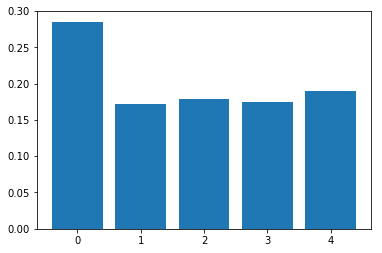

In [95]:
plt.bar( [0,1,2,3,4], out[0] )

----